<a href="https://colab.research.google.com/github/veetihietasalo/git_test/blob/master/aikasarjat_extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selventäviä esimerkkejä aikasarjoista

In [ ]:
# tavanomaiset kirjastot:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# tuodaan lisäksi numpy:
import numpy as np

## Indeksi aikasarjoissa

In [ ]:
# Tuodaan Dow Jones -indeksi
dowjones = sns.load_dataset('dowjones')
dowjones.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


In [ ]:
# Katsotaan millaisia muuttujat ovat
# Päivämäärä on tyypiltään datetime64
dowjones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    649 non-null    datetime64[ns]
 1   Price   649 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.3 KB


Tämä on kätevä, koska nyt python "ymmärtää" päivämäärät ja niitä on helpompi hallita. Katsotaan seuraavaksi, miten tällainen muuttuja luodaan.

Oletetaan, että meillä on aineisto päivittäisiä mittauksia vuoden 2020 alusta. Generoidaan tällainen esimerkin vuoksi:

In [ ]:
satunnaisia_lukuja = np.random.normal(100,20,400).round(2)
satunnaisia_lukuja[0:10]

array([134.95,  96.44,  94.74,  92.8 , 105.5 , 124.92, 106.65,  76.84,
        86.59, 104.12])

In [ ]:
# muodostetaan näistä satunnaisista luvuista dataframe. Annetaan muuttujalle nimeksi vaikkapa hinta:
df = pd.DataFrame({'hinta': satunnaisia_lukuja})
df

,hinta
0,134.95
1,96.44
2,94.74
3,92.80
4,105.50
...,...
395,95.13
396,106.12
397,108.37
398,133.74


In [ ]:
# muunnetaan indeksi päiviksi vuoden 2020 alusta:
df.index = pd.date_range('2020-1-1', periods=400, freq='d')
df

,hinta
2020-01-01,134.95
2020-01-02,96.44
2020-01-03,94.74
2020-01-04,92.80
2020-01-05,105.50
...,...
2021-01-30,95.13
2021-01-31,106.12
2021-02-01,108.37
2021-02-02,133.74


<Axes: >

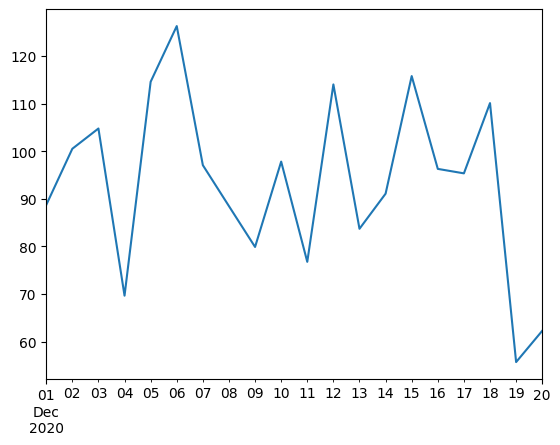

In [ ]:
# tehdään kuvaaja joulukuun 2020 arvoista:
df['hinta']['2020-12-1':'2020-12-20'].plot()

## Volatiliteetti

Selvennetään volatiliteetin käsitettä esimerkin avulla. Volatiliteetti mittaa riskiä.

In [ ]:
# muodostetaan ensin kolme satunnaista aikasarjaa, joissa on eri määrä vaihtelua

# Arvotaan 60 kpl lukuja kuhunkin. Ensimmäisessä vähän vaihtelua, toisessa jonkin verran, kolmannessa paljon.
eka = np.random.normal(100,1,60)
toka = np.random.normal(100,10,60)
kolmas = np.random.normal(100,50,60)

# Muokataan nämä dataframeiksi. Annetaan muuttujalle vaikkapa nimi 'arvo':
df1 = pd.DataFrame({'arvo': eka})
df2 = pd.DataFrame({'arvo': toka})
df3 = pd.DataFrame({'arvo': kolmas})

# Lisätään vielä aikaleimat:
df1.index = pd.date_range('2023-1-1', periods=60, freq='d')
df2.index = pd.date_range('2023-1-1', periods=60, freq='d')
df3.index = pd.date_range('2023-1-1', periods=60, freq='d')

<Axes: title={'center': 'Kolmas, paljon vaihtelua'}>

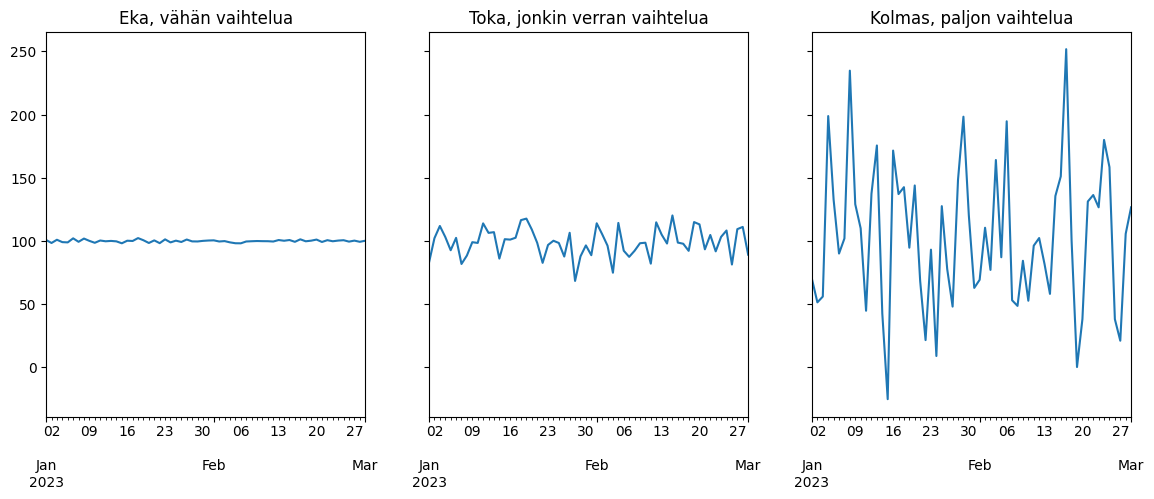

In [ ]:
# Katsotaan, miltä nämä aikasarjat näyttävät:
fig, ax = plt.subplots(1,3,figsize=(14,5), sharey=True)
df1.plot(ax=ax[0], legend=None, title='Eka, vähän vaihtelua')
df2.plot(ax=ax[1], legend=None, title='Toka, jonkin verran vaihtelua')
df3.plot(ax=ax[2], legend=None, title='Kolmas, paljon vaihtelua')

Ensimmäisessä on siis vähän vaihtelua (kaikki arvot ovat noin 100), jolloin tulevan arvon suuruusluokka on helppo ennustaa (olettaen, että aikasarja pysyy suunnilleen samanlaisena). Toisessa vaihtelua on jo jonkin verran, jolloin suuruusluokan ennustaminen on hankalampaa. Silmämääräisesti arvot ovat välillä [75,125]. Viimeisessä ennustaminen on hyvin vaikeaa. Arvot vaihtelevat suurella välillä.

<Axes: title={'center': 'Kolmannen liukuva volatiliteetti'}>

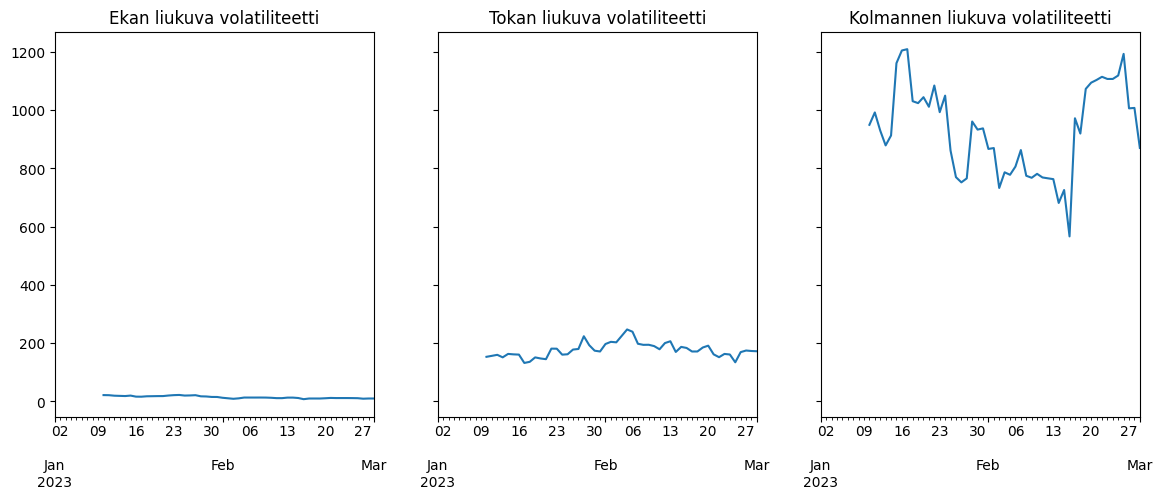

In [ ]:
# tarkastellaan seuraavaksi volatiliteettia
# lasketaan kymmenen päivän liukuva volatiliteetti

fig, ax = plt.subplots(1,3,figsize=(14,5), sharey=True)
(df1['arvo'].rolling(10).std()*(252**0.5)).plot(ax=ax[0], legend=None, title='Ekan liukuva volatiliteetti')
(df2['arvo'].rolling(10).std()*(252**0.5)).plot(ax=ax[1], legend=None, title='Tokan liukuva volatiliteetti')
(df3['arvo'].rolling(10).std()*(252**0.5)).plot(ax=ax[2], legend=None, title='Kolmannen liukuva volatiliteetti')